In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [291]:
historical_transaction_data = pd.read_csv("Datasets\Historical-transaction-data.csv")
store_info_data = pd.read_csv("Datasets\Store-info.csv")
test_df = pd.read_csv("Datasets\Testing-data.csv")

In [292]:
historical_transaction_data.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


In [293]:
historical_transaction_data.dtypes

item_description     object
transaction_date     object
invoice_id          float64
customer_id          object
shop_id              object
item_price            int64
quantity_sold         int64
dtype: object

In [294]:
historical_transaction_data["shop_id"].nunique()

124

In [295]:
historical_transaction_data.isna().sum()

item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
dtype: int64

In [296]:
historical_transaction_data.shape

(473974, 7)

In [297]:
# Get the rows with quantity_sold has the value 0
historical_transaction_data.loc[historical_transaction_data["quantity_sold"] == 0]

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
54,CREAM SODA 500ML,2021-12-09T00:00:00.000Z,24423.0,E5FE,SHOP003,100,0
103,SODA 500ML,2021-10-31T00:00:00.000Z,31745.0,ZJY2,SHOP090,70,0
230,CREAM SODA 1.5L,2021-12-10T00:00:00.000Z,52904.0,57RR,SHOP040,220,0
273,NECTO 1.5L,2021-11-12T00:00:00.000Z,59336.0,UVU7,SHOP103,220,0
465,LEMONADE 500ML,2021-11-10T00:00:00.000Z,111021.0,K58C,SHOP032,100,0
...,...,...,...,...,...,...,...
473838,CREAM SODA 1.5L,2021-11-29T00:00:00.000Z,NaN,ZEVD,SHOP021,220,0
473863,FIT O MANGO 1L,2021-10-16T00:00:00.000Z,NaN,M0LJ,SHOP101,290,0
473884,CREAM SODA 1.5L,2021-10-27T00:00:00.000Z,NaN,UARW,SHOP072,220,0
473913,CREAM SODA 500ML,2021-12-09T00:00:00.000Z,NaN,N0BG,SHOP027,100,0


<Axes: xlabel='quantity_sold', ylabel='shop_id'>

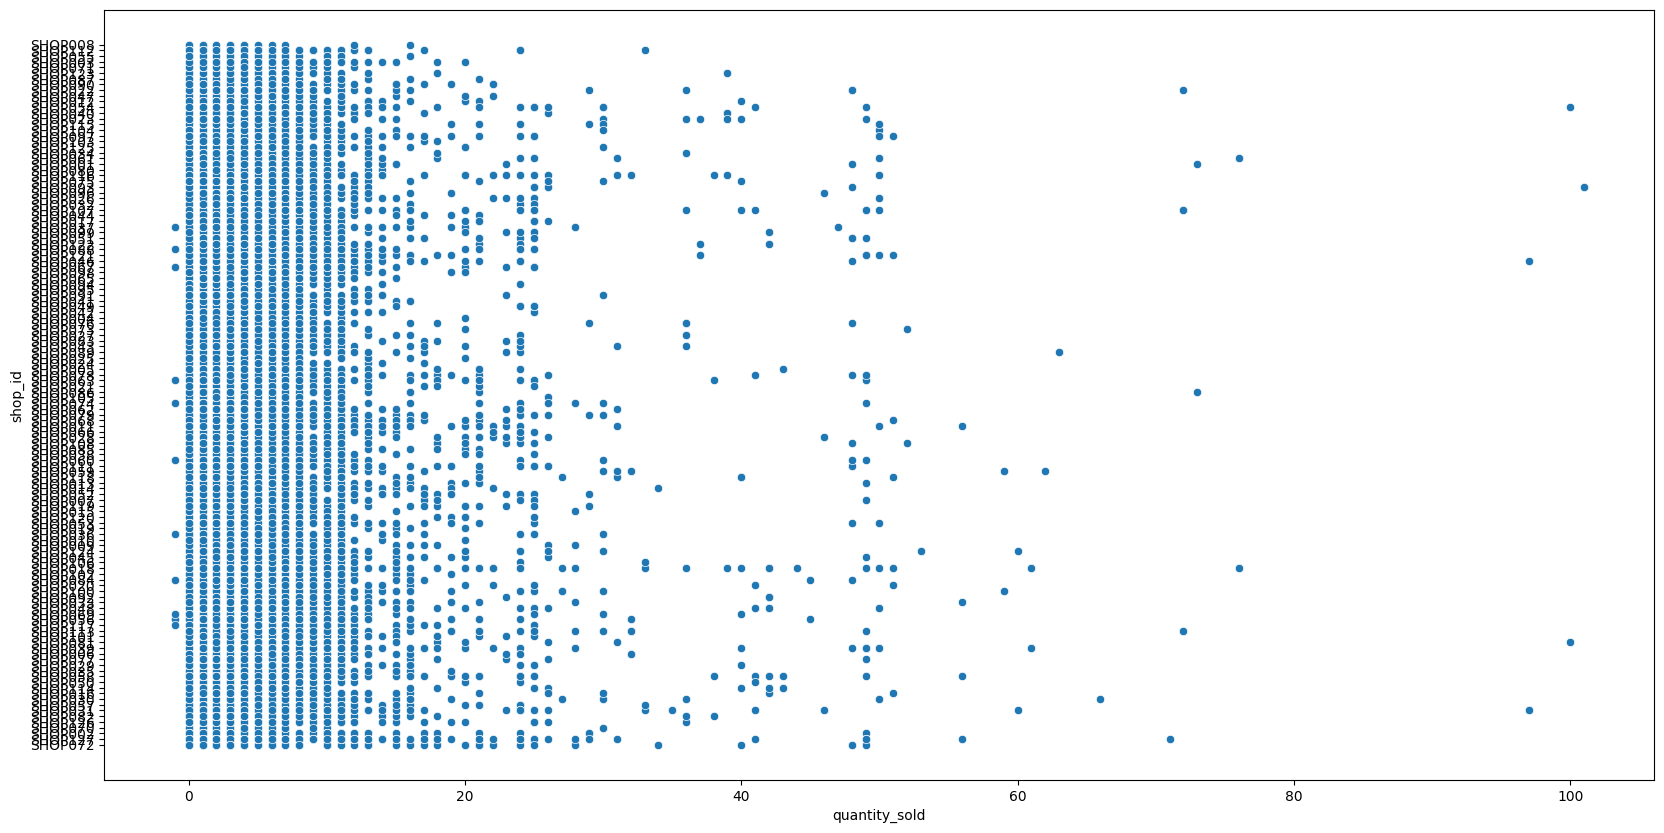

In [298]:
# plot the values of quantity_sold and shop_id
plt.figure(figsize=(20, 10))
sns.scatterplot(x="quantity_sold", y="shop_id", data=historical_transaction_data)


# Working with item_description feature


In [299]:
historical_transaction_data["item_description"].unique()

array(['ORANGE BARLEY 1.5L', 'GINGER BEER 1.5L', 'TONIC PET 500ML',
       'CREAM SODA 1L', 'STRAWBERRY MILK 180ML', 'CREAM SODA 1.5L',
       'TWISTEE APPLE 1L', 'FIT O MIXED FRUIT 200ML', 'SODA PET 1.5L',
       'FIT O MIXED FRUIT 1L', 'KIK COLA 1L', 'LEMONADE 500ML',
       'FIT O ORANGE 1L', 'NECTO 1.5L', 'LEMONADE 1.5L', 'GINGER BEER 1L',
       'FIT O MANGO 200ML', 'FIT O MANGO 1L', 'CREAM SODA 500ML',
       'FIT O ORANGE 200ML', nan, 'CREAM SODA APPLE POP 1L',
       'BOTTLED DRINKING WATER 500ML', 'SODA 500ML', 'GINGER BEER 500ML',
       'SODA 1L', 'NECTO 500ML', 'ORANGE CRUSH 500ML',
       'BOTTLED DRINKING WATER 1.5L', 'NECTO 1L',
       'GINGER BEER SUGAR FREE 500ML', 'ORANGE CRUSH 1.5L',
       'DRY GINGER ALE PET 500ML', 'LEMONADE 1L', 'ORANGE CRUSH 1L',
       'GINGER BEER 400ML', 'CHOCOLATE MILK 180ML', 'LIME CRUSH JUICE 1L'],
      dtype=object)

In [300]:
historical_transaction_data["item_description"].nunique()

37

In [301]:
train_df = historical_transaction_data.copy(deep=True)

In [302]:
train_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


In [303]:
train_df[["item_name", "item_quantity"]] = train_df["item_description"].str.rsplit(
    " ", n=1, expand=True
)

In [304]:
train_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_quantity
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2,ORANGE BARLEY,1.5L
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2,GINGER BEER,1.5L
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2,TONIC PET,500ML
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2,CREAM SODA,1L
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5,STRAWBERRY MILK,180ML


### Covert the values in the item_quantity to liters


In [305]:
def convert_to_liters(value):
    try:
        if value[-2:] == "ML":
            return float(value[:-2]) / 1000
        else:
            return float(value[:-1])
    except:
        return np.NaN

In [306]:
train_df["item_quantity_in_liters"] = train_df["item_quantity"].apply(
    lambda x: convert_to_liters(x)
)

In [307]:
train_df["item_quantity_in_liters"].head()

0    1.50
1    1.50
2    0.50
3    1.00
4    0.18
Name: item_quantity_in_liters, dtype: float64

### Drop the item_quantity column


In [308]:
train_df.drop(["item_quantity"], axis=1, inplace=True)

In [309]:
train_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_quantity_in_liters
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2,ORANGE BARLEY,1.50
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2,GINGER BEER,1.50
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2,TONIC PET,0.50
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2,CREAM SODA,1.00
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5,STRAWBERRY MILK,0.18


### Drop the item_description column


In [310]:
train_df.drop(["item_description"], axis=1, inplace=True)

In [311]:
train_df.head()

,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_quantity_in_liters
0,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2,ORANGE BARLEY,1.50
1,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2,GINGER BEER,1.50
2,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2,TONIC PET,0.50
3,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2,CREAM SODA,1.00
4,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5,STRAWBERRY MILK,0.18


# Working on customers interest


In [312]:
train_df.head()

,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_quantity_in_liters
0,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2,ORANGE BARLEY,1.50
1,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2,GINGER BEER,1.50
2,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2,TONIC PET,0.50
3,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2,CREAM SODA,1.00
4,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5,STRAWBERRY MILK,0.18


In [313]:
train_df["customer_id"].nunique()

191636

In [314]:
unique_customers = (
    train_df[["shop_id", "customer_id"]].groupby("shop_id")["customer_id"].nunique()
)

In [315]:
unique_customers_df = unique_customers.to_frame().reset_index()

In [316]:
unique_customers_df.head()

,shop_id,customer_id
0,SHOP001,1118
1,SHOP002,2577
2,SHOP003,2064
3,SHOP004,1744
4,SHOP005,2203


In [317]:
unique_customers_df = unique_customers_df.rename(
    columns={"customer_id": "unique_customers"}
)

In [318]:
unique_customers_df.head()

,shop_id,unique_customers
0,SHOP001,1118
1,SHOP002,2577
2,SHOP003,2064
3,SHOP004,1744
4,SHOP005,2203


In [319]:
customer_info_df = pd.merge(unique_customers_df, store_info_data, on="shop_id")

In [320]:
customer_info_df.head()

,shop_id,unique_customers,shop_area_sq_ft,shop_profile
0,SHOP001,1118,580,Low
1,SHOP002,2577,637,NaN
2,SHOP003,2064,810,High
3,SHOP004,1744,516,Low
4,SHOP005,2203,617,Low


In [321]:
store_info_data = customer_info_df.copy(deep=True)

In [322]:
store_info_data.head()

,shop_id,unique_customers,shop_area_sq_ft,shop_profile
0,SHOP001,1118,580,Low
1,SHOP002,2577,637,NaN
2,SHOP003,2064,810,High
3,SHOP004,1744,516,Low
4,SHOP005,2203,617,Low


<Figure size 2000x1000 with 0 Axes>

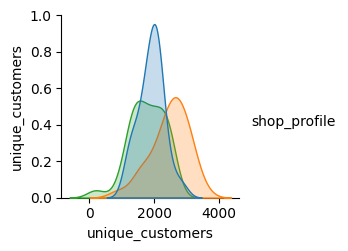

In [323]:

cur_temp_df = store_info_data.copy(deep=True)
plt.figure(figsize=(20, 10))
# sns pair plot to show the hue with shop_profile and unique_customers in cur_temp_df
sns.pairplot(cur_temp_df, hue="shop_profile", vars=["unique_customers"])

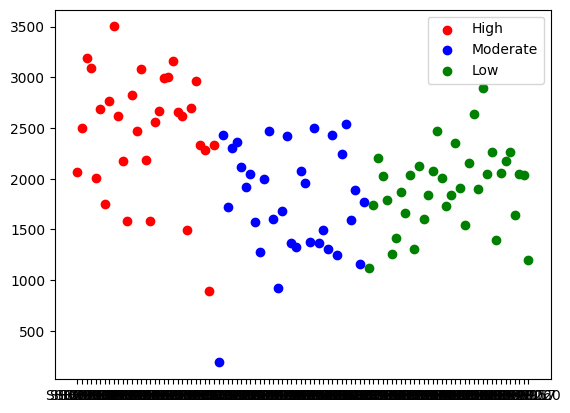

In [324]:
# pivot_table = pd.pivot_table(cur_temp_df, index='shop_id', columns='shop_profile', values='unique_customers')

# create a bar plot for each shop_id with the shop_profile categories colored differently
# pivot_table.plot(kind='bar', stacked=True)

# add axis labels and a title
# plt.xlabel('Shop ID')
# plt.ylabel('Number of Unique Customers')
# plt.title('Unique Customers per Shop by Shop Profile')

plt.scatter(
    cur_temp_df[cur_temp_df["shop_profile"] == "High"]["shop_id"],
    cur_temp_df[cur_temp_df["shop_profile"] == "High"]["unique_customers"],
    color="red",
)
plt.scatter(
    cur_temp_df[cur_temp_df["shop_profile"] == "Moderate"]["shop_id"],
    cur_temp_df[cur_temp_df["shop_profile"] == "Moderate"]["unique_customers"],
    color="blue",
)
plt.scatter(
    cur_temp_df[cur_temp_df["shop_profile"] == "Low"]["shop_id"],
    cur_temp_df[cur_temp_df["shop_profile"] == "Low"]["unique_customers"],
    color="green",
)
plt.legend(["High", "Moderate", "Low"])

# show the plot
plt.show()

# Fix Quantity


In [325]:
min_prices = (
    train_df[["item_name", "item_price"]]
    .groupby("item_name")["item_price"]
    .min()
    .to_dict()
)

# if item_name is in min_prices, then use min_prices[item_name] to calculate the quantity sold or use the existing quantity sold


def calculate_quantity_sold(row):
    if row["item_name"] in min_prices:
        return row["item_price"] // min_prices[row["item_name"]]
    elif row['quantity_sold'] == 0:
        return 1
    else:
        return row["quantity_sold"]


train_df["quantity_sold"] = train_df.apply(
    lambda row: calculate_quantity_sold(row), axis=1
)

In [326]:
train_df["customer_id"].nunique()

191636

In [327]:
train_df.head()

,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_quantity_in_liters
0,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,ORANGE BARLEY,1.50
1,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2,GINGER BEER,1.50
2,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,TONIC PET,0.50
3,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,CREAM SODA,1.00
4,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,STRAWBERRY MILK,0.18


# Handling the outliers

<Axes: xlabel='quantity_sold', ylabel='shop_id'>

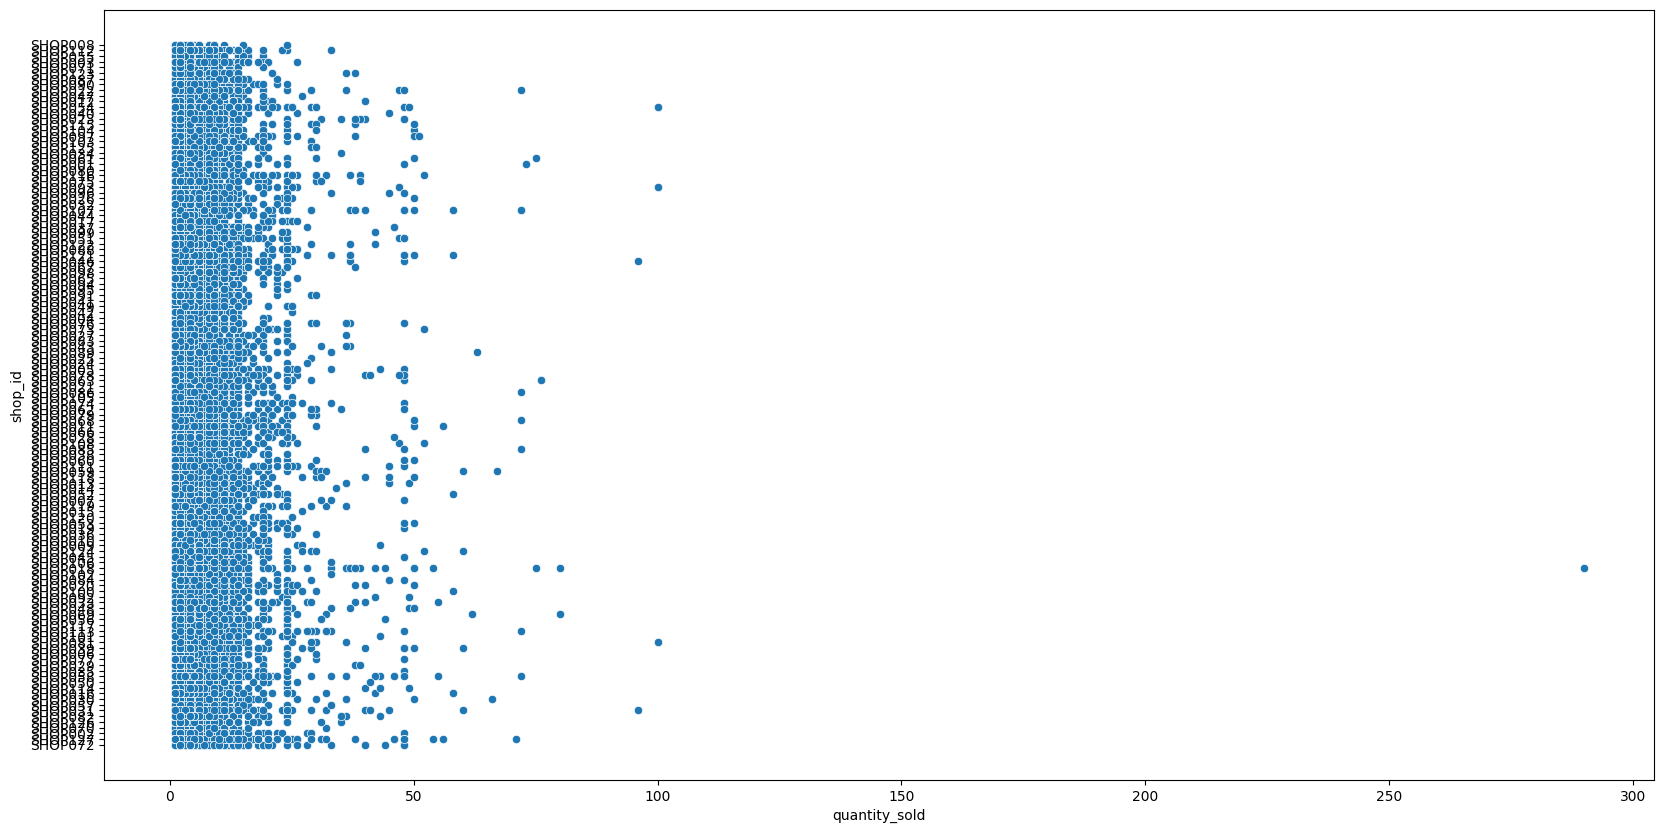

In [328]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="quantity_sold", y="shop_id", data=train_df)

In [329]:
train_df['quantity_sold'].describe()

count    473974.000000
mean          2.146289
std           2.188557
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max         290.000000
Name: quantity_sold, dtype: float64

In [330]:
train_df['quantity_sold'].quantile(0.995)

13.0

In [331]:
train_df.shape

(473974, 8)

In [332]:
train_df.loc[train_df['quantity_sold'] > 10]

,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_quantity_in_liters
135,2021-11-18T00:00:00.000Z,36120.0,S5CW,SHOP047,980,15,NaN,NaN
243,2021-12-09T00:00:00.000Z,54821.0,HNZM,SHOP104,870,14,FIT O ORANGE,1.0
292,2021-11-29T00:00:00.000Z,61989.0,HKGS,SHOP103,1100,11,CREAM SODA,1.5
301,2021-12-07T00:00:00.000Z,64257.0,4FIT,SHOP097,1120,18,FIT O ORANGE,0.2
749,2021-10-30T00:00:00.000Z,168899.0,WSIR,SHOP095,880,11,GINGER BEER,1.5
...,...,...,...,...,...,...,...,...
473935,2021-12-12T00:00:00.000Z,NaN,BPYN,SHOP079,880,11,GINGER BEER,1.5
473940,2021-11-14T00:00:00.000Z,NaN,XA5U,SHOP058,1320,16,GINGER BEER,1.5
473949,2021-12-05T00:00:00.000Z,NaN,EEL0,SHOP039,870,14,FIT O ORANGE,1.0
473950,2021-12-05T00:00:00.000Z,NaN,EEL0,SHOP039,1100,13,GINGER BEER,1.5


In [333]:
# get the rows where the quantity_sold is greater than 13 (0.995 quantile)
# drop the rows from the train_df where quantity_sold is greater than 13
train_df.drop(train_df[train_df['quantity_sold'] > 10].index, inplace=True)
# train_df.loc[train_df['quantity_sold'] > 13]


In [334]:
train_df.shape

(469959, 8)

<Axes: xlabel='quantity_sold', ylabel='shop_id'>

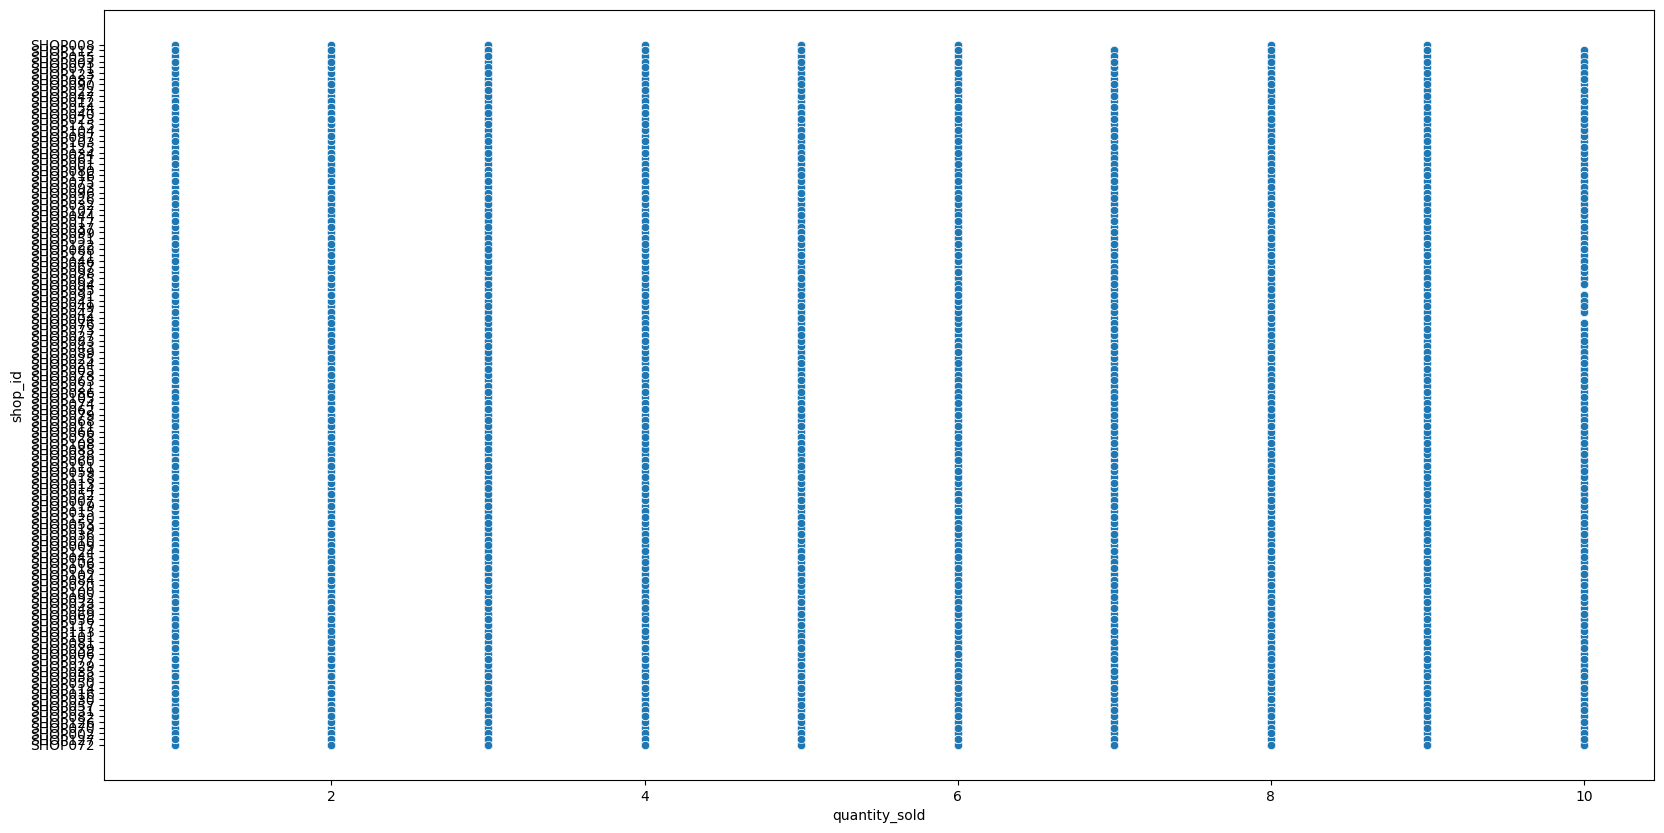

In [335]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="quantity_sold", y="shop_id", data=train_df)

# Working with Sales


In [336]:
train_df.head()

,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_quantity_in_liters
0,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,ORANGE BARLEY,1.50
1,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2,GINGER BEER,1.50
2,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,TONIC PET,0.50
3,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,CREAM SODA,1.00
4,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,STRAWBERRY MILK,0.18


In [337]:
tot_sales = train_df[["shop_id", "item_price"]].groupby("shop_id")["item_price"].sum()

In [338]:
tot_sales_df = tot_sales.to_frame().reset_index()
tot_sales_df.head()

,shop_id,item_price
0,SHOP001,409865
1,SHOP002,1036190
2,SHOP003,733080
3,SHOP004,686350
4,SHOP005,802715


In [339]:
store_info_data.head()

,shop_id,unique_customers,shop_area_sq_ft,shop_profile
0,SHOP001,1118,580,Low
1,SHOP002,2577,637,NaN
2,SHOP003,2064,810,High
3,SHOP004,1744,516,Low
4,SHOP005,2203,617,Low


In [340]:
tot_sales_df = tot_sales_df.rename(columns={"item_price": "total_sales"})

In [341]:
tot_sales_df.head()

,shop_id,total_sales
0,SHOP001,409865
1,SHOP002,1036190
2,SHOP003,733080
3,SHOP004,686350
4,SHOP005,802715


In [342]:
store_info_df = pd.merge(tot_sales_df, store_info_data, on="shop_id")

In [343]:
store_info_df.head()

,shop_id,total_sales,unique_customers,shop_area_sq_ft,shop_profile
0,SHOP001,409865,1118,580,Low
1,SHOP002,1036190,2577,637,NaN
2,SHOP003,733080,2064,810,High
3,SHOP004,686350,1744,516,Low
4,SHOP005,802715,2203,617,Low


In [344]:
store_info_data = store_info_df.copy(deep=True)

In [345]:
store_info_data.head()

,shop_id,total_sales,unique_customers,shop_area_sq_ft,shop_profile
0,SHOP001,409865,1118,580,Low
1,SHOP002,1036190,2577,637,NaN
2,SHOP003,733080,2064,810,High
3,SHOP004,686350,1744,516,Low
4,SHOP005,802715,2203,617,Low


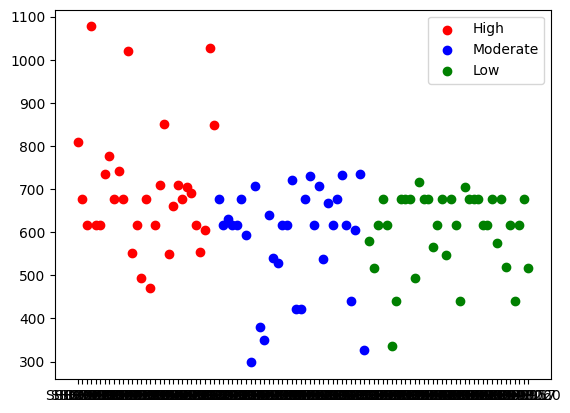

In [346]:
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "High"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "High"]["shop_area_sq_ft"],
    color="red",
)
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "Moderate"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "Moderate"]["shop_area_sq_ft"],
    color="blue",
)
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "Low"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "Low"]["shop_area_sq_ft"],
    color="green",
)
plt.legend(["High", "Moderate", "Low"])

# show the plot
plt.show()

# Work on date


In [347]:
# Seperate date into day, month, year, time and day of week
train_df["transaction_date"] = pd.to_datetime(train_df["transaction_date"])
train_df["transaction_day"] = train_df["transaction_date"].dt.day
train_df["transaction_month"] = train_df["transaction_date"].dt.month
train_df["transaction_year"] = train_df["transaction_date"].dt.year
train_df["transaction_time"] = train_df["transaction_date"].dt.time
train_df["transaction_day_of_week"] = train_df["transaction_date"].dt.dayofweek

train_df.head()

,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_quantity_in_liters,transaction_day,transaction_month,transaction_year,transaction_time,transaction_day_of_week
0,2021-12-11 00:00:00+00:00,147.0,BGXA,SHOP008,220,1,ORANGE BARLEY,1.50,11,12,2021,00:00:00,5
1,2021-10-17 00:00:00+00:00,371.0,IA25,SHOP112,220,2,GINGER BEER,1.50,17,10,2021,00:00:00,6
2,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,160,1,TONIC PET,0.50,13,12,2021,00:00:00,0
3,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,150,1,CREAM SODA,1.00,13,12,2021,00:00:00,0
4,2021-10-23 00:00:00+00:00,1310.0,7S00,SHOP112,210,3,STRAWBERRY MILK,0.18,23,10,2021,00:00:00,5


In [348]:
# Print the number of unique values in each column
for col in train_df.columns:
    print(col, train_df[col].nunique())

transaction_date 62
invoice_id 341040
customer_id 190913
shop_id 124
item_price 77
quantity_sold 10
item_name 21
item_quantity_in_liters 6
transaction_day 31
transaction_month 3
transaction_year 1
transaction_time 1
transaction_day_of_week 7


In [349]:
# Remove time and year
train_df.drop(["transaction_time", "transaction_year"], axis=1, inplace=True)

In [350]:
train_df.head()

,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_quantity_in_liters,transaction_day,transaction_month,transaction_day_of_week
0,2021-12-11 00:00:00+00:00,147.0,BGXA,SHOP008,220,1,ORANGE BARLEY,1.50,11,12,5
1,2021-10-17 00:00:00+00:00,371.0,IA25,SHOP112,220,2,GINGER BEER,1.50,17,10,6
2,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,160,1,TONIC PET,0.50,13,12,0
3,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,150,1,CREAM SODA,1.00,13,12,0
4,2021-10-23 00:00:00+00:00,1310.0,7S00,SHOP112,210,3,STRAWBERRY MILK,0.18,23,10,5


# Average customers per month

In [406]:
# Average Customers per Month per Shop
avg_customers_per_month = train_df.groupby(['shop_id', 'transaction_month'])['customer_id'].nunique().reset_index()
avg_customers_per_month = avg_customers_per_month.groupby('shop_id')['customer_id'].mean().reset_index()
avg_customers_per_month = avg_customers_per_month.rename(columns={'customer_id': 'avg_customers_per_month'})

avg_customers_per_month.head()

# Merge with store info
store_info_data = pd.merge(store_info_data, avg_customers_per_month, on="shop_id")
store_info_data.head()

,shop_id,came_more_than_once,total_sales,unique_customers,shop_area_sq_ft,shop_profile,most_sold_item,time_since_last_purchase,weekend_sales,weekday_sales,total_units_sold,average_shop_earning,total_invoices,december_sales,total_liters_of_beverage_sold,avg_customers_per_month
0,SHOP001,400,409865,1118,580,Low,GINGER BEER,8.731369,202830,207035,4128,261.946265,1526,150800,4335.36,447.0
1,SHOP002,919,1036190,2577,637,NaN,GINGER BEER,7.968026,503445,532745,10229,274.839486,3738,369125,11137.70,1033.0
2,SHOP003,694,733080,2064,810,High,GINGER BEER,8.706029,373805,359275,7388,254.380267,2848,240805,7736.52,817.0
3,SHOP004,684,686350,1744,516,Low,GINGER BEER,8.569122,371130,315220,6884,259.055238,2625,235660,7197.96,725.0
4,SHOP005,817,802715,2203,617,Low,GINGER BEER,8.474888,428370,374345,8323,247.589258,3165,229860,8175.80,905.0


# Get the total sales for 12th month

In [388]:
train_df.head()

,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_quantity_in_liters,transaction_day,transaction_month,transaction_day_of_week
0,2021-12-11 00:00:00+00:00,147.0,BGXA,SHOP008,220,1,ORANGE BARLEY,1.50,11,12,5
1,2021-10-17 00:00:00+00:00,371.0,IA25,SHOP112,220,2,GINGER BEER,1.50,17,10,6
2,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,160,1,TONIC PET,0.50,13,12,0
3,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,150,1,CREAM SODA,1.00,13,12,0
4,2021-10-23 00:00:00+00:00,1310.0,7S00,SHOP112,210,3,STRAWBERRY MILK,0.18,23,10,5


In [389]:
# create a new column called total_sales_december
# group by shop_id and month and sum the item_price
# if month is 12, then add the item_price to the total_sales_december column
# else add 0 to the total_sales_december column

month_shop_sales = train_df[train_df["transaction_month"] == 12].reset_index()

In [390]:
month_shop_sales.head()

,index,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_quantity_in_liters,transaction_day,transaction_month,transaction_day_of_week
0,0,2021-12-11 00:00:00+00:00,147.0,BGXA,SHOP008,220,1,ORANGE BARLEY,1.5,11,12,5
1,2,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,160,1,TONIC PET,0.5,13,12,0
2,3,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,150,1,CREAM SODA,1.0,13,12,0
3,17,2021-12-01 00:00:00+00:00,7946.0,ZYJ7,SHOP112,200,2,LEMONADE,0.5,1,12,2
4,18,2021-12-02 00:00:00+00:00,8258.0,JM5Q,SHOP112,290,4,FIT O ORANGE,1.0,2,12,3


In [391]:
december_sales = month_shop_sales.groupby(["shop_id"])['item_price'].sum().reset_index()
december_sales = pd.DataFrame(december_sales)
december_sales.head()

,shop_id,item_price
0,SHOP001,150800
1,SHOP002,369125
2,SHOP003,240805
3,SHOP004,235660
4,SHOP005,229860


In [392]:
december_sales = december_sales.rename(columns={'item_price': 'december_sales'})

In [393]:
december_sales.head()

,shop_id,december_sales
0,SHOP001,150800
1,SHOP002,369125
2,SHOP003,240805
3,SHOP004,235660
4,SHOP005,229860


In [394]:
store_info_data.head()

,shop_id,came_more_than_once,total_sales,unique_customers,shop_area_sq_ft,shop_profile,most_sold_item,time_since_last_purchase,weekend_sales,weekday_sales,total_units_sold,average_shop_earning,total_invoices
0,SHOP001,400,409865,1118,580,Low,GINGER BEER,8.731369,202830,207035,4128,261.946265,1526
1,SHOP002,919,1036190,2577,637,NaN,GINGER BEER,7.968026,503445,532745,10229,274.839486,3738
2,SHOP003,694,733080,2064,810,High,GINGER BEER,8.706029,373805,359275,7388,254.380267,2848
3,SHOP004,684,686350,1744,516,Low,GINGER BEER,8.569122,371130,315220,6884,259.055238,2625
4,SHOP005,817,802715,2203,617,Low,GINGER BEER,8.474888,428370,374345,8323,247.589258,3165


In [395]:
store_info_data = pd.merge(store_info_data, december_sales, on="shop_id")

store_info_data.head()

,shop_id,came_more_than_once,total_sales,unique_customers,shop_area_sq_ft,shop_profile,most_sold_item,time_since_last_purchase,weekend_sales,weekday_sales,total_units_sold,average_shop_earning,total_invoices,december_sales
0,SHOP001,400,409865,1118,580,Low,GINGER BEER,8.731369,202830,207035,4128,261.946265,1526,150800
1,SHOP002,919,1036190,2577,637,NaN,GINGER BEER,7.968026,503445,532745,10229,274.839486,3738,369125
2,SHOP003,694,733080,2064,810,High,GINGER BEER,8.706029,373805,359275,7388,254.380267,2848,240805
3,SHOP004,684,686350,1744,516,Low,GINGER BEER,8.569122,371130,315220,6884,259.055238,2625,235660
4,SHOP005,817,802715,2203,617,Low,GINGER BEER,8.474888,428370,374345,8323,247.589258,3165,229860


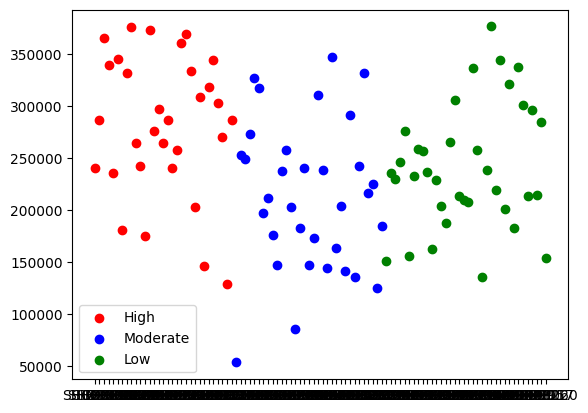

In [396]:
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "High"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "High"]["december_sales"],
    color="red",
)
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "Moderate"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "Moderate"]["december_sales"],
    color="blue",
)
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "Low"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "Low"]["december_sales"],
    color="green",
)
plt.legend(["High", "Moderate", "Low"])

# show the plot
plt.show()

# Work on most popular beverage


In [351]:
# Get most popular item per shop

item_counts = train_df.groupby(["shop_id", "item_name"])["quantity_sold"].sum()

most_popular_items = item_counts.groupby("shop_id").idxmax().reset_index()
most_popular_items.columns = ["shop_id", "most_sold_item"]
most_popular_items["most_sold_item"] = most_popular_items["most_sold_item"].str[1]

most_popular_items.count()

shop_id           124
most_sold_item    124
dtype: int64

In [352]:
# Merge with store info
store_info_data = pd.merge(store_info_data, most_popular_items, on="shop_id")

store_info_data.head()

,shop_id,total_sales,unique_customers,shop_area_sq_ft,shop_profile,most_sold_item
0,SHOP001,409865,1118,580,Low,GINGER BEER
1,SHOP002,1036190,2577,637,NaN,GINGER BEER
2,SHOP003,733080,2064,810,High,GINGER BEER
3,SHOP004,686350,1744,516,Low,GINGER BEER
4,SHOP005,802715,2203,617,Low,GINGER BEER


# Average time between orders


In [353]:
train_df_ = train_df.copy(deep=True)

train_df_.sort_values(["customer_id", "transaction_date"], inplace=True)

train_df_

,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_quantity_in_liters,transaction_day,transaction_month,transaction_day_of_week
452281,2021-10-16 00:00:00+00:00,370560.0,0.00E+00,SHOP010,440,2,ORANGE BARLEY,1.5,16,10,5
308101,2021-10-26 00:00:00+00:00,61463.0,0.00E+00,SHOP034,880,4,ORANGE BARLEY,1.5,26,10,1
454752,2021-10-27 00:00:00+00:00,1328902.0,0.00E+00,SHOP111,270,4,FIT O ORANGE,1.0,27,10,2
333814,2021-10-29 00:00:00+00:00,668008.0,0.00E+00,SHOP081,110,1,SODA,1.0,29,10,4
333815,2021-10-29 00:00:00+00:00,668008.0,0.00E+00,SHOP081,150,1,GINGER BEER,1.0,29,10,4
...,...,...,...,...,...,...,...,...,...,...,...
202042,2021-11-21 00:00:00+00:00,213333.0,ZZZW,SHOP073,160,1,SODA PET,1.5,21,11,6
202043,2021-11-21 00:00:00+00:00,213333.0,ZZZW,SHOP073,220,2,GINGER BEER,1.5,21,11,6
234007,2021-11-25 00:00:00+00:00,3233435.0,ZZZW,SHOP074,220,2,GINGER BEER,1.5,25,11,3
463571,2021-12-04 00:00:00+00:00,294745.0,ZZZW,SHOP074,160,1,SODA PET,1.5,4,12,5


In [354]:
train_df_["time_since_last_purchase"] = (
    train_df_.groupby("customer_id")["transaction_date"].diff().dt.days
)
train_df_

,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_quantity_in_liters,transaction_day,transaction_month,transaction_day_of_week,time_since_last_purchase
452281,2021-10-16 00:00:00+00:00,370560.0,0.00E+00,SHOP010,440,2,ORANGE BARLEY,1.5,16,10,5,NaN
308101,2021-10-26 00:00:00+00:00,61463.0,0.00E+00,SHOP034,880,4,ORANGE BARLEY,1.5,26,10,1,10.0
454752,2021-10-27 00:00:00+00:00,1328902.0,0.00E+00,SHOP111,270,4,FIT O ORANGE,1.0,27,10,2,1.0
333814,2021-10-29 00:00:00+00:00,668008.0,0.00E+00,SHOP081,110,1,SODA,1.0,29,10,4,2.0
333815,2021-10-29 00:00:00+00:00,668008.0,0.00E+00,SHOP081,150,1,GINGER BEER,1.0,29,10,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
202042,2021-11-21 00:00:00+00:00,213333.0,ZZZW,SHOP073,160,1,SODA PET,1.5,21,11,6,NaN
202043,2021-11-21 00:00:00+00:00,213333.0,ZZZW,SHOP073,220,2,GINGER BEER,1.5,21,11,6,0.0
234007,2021-11-25 00:00:00+00:00,3233435.0,ZZZW,SHOP074,220,2,GINGER BEER,1.5,25,11,3,4.0
463571,2021-12-04 00:00:00+00:00,294745.0,ZZZW,SHOP074,160,1,SODA PET,1.5,4,12,5,9.0


In [355]:
avg_time_between_purchases = (
    train_df_.groupby("shop_id")["time_since_last_purchase"].mean().reset_index()
)

In [356]:
# Merge with store info
store_info_data = pd.merge(store_info_data, avg_time_between_purchases, on="shop_id")
store_info_data.head()

,shop_id,total_sales,unique_customers,shop_area_sq_ft,shop_profile,most_sold_item,time_since_last_purchase
0,SHOP001,409865,1118,580,Low,GINGER BEER,8.731369
1,SHOP002,1036190,2577,637,NaN,GINGER BEER,7.968026
2,SHOP003,733080,2064,810,High,GINGER BEER,8.706029
3,SHOP004,686350,1744,516,Low,GINGER BEER,8.569122
4,SHOP005,802715,2203,617,Low,GINGER BEER,8.474888


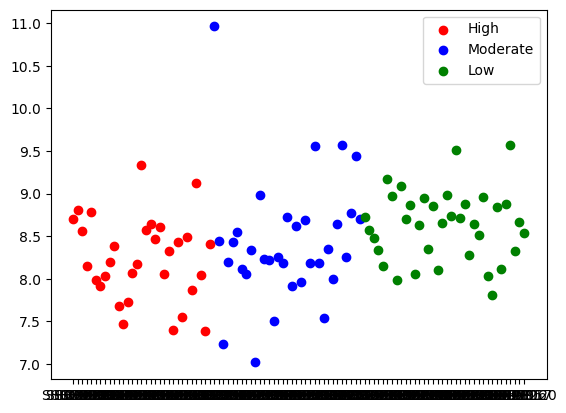

In [357]:
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "High"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "High"]["time_since_last_purchase"],
    color="red",
)
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "Moderate"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "Moderate"]["time_since_last_purchase"],
    color="blue",
)
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "Low"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "Low"]["time_since_last_purchase"],
    color="green",
)
plt.legend(["High", "Moderate", "Low"])

# show the plot
plt.show()

# Weekend Weekday Sales

In [358]:
train_df_2 = train_df_.copy(deep=True)

# Weekend boolean column
train_df_2['weekend'] = train_df_2['transaction_day_of_week'].apply(lambda x: 1 if x >= 4 else 0)

weekend_sales = train_df_2[train_df_2['weekend'] == 1].groupby('shop_id')['item_price'].sum().reset_index()
weekend_sales = weekend_sales.rename(columns={'item_price': 'weekend_sales'})

weekday_sales = train_df_2[train_df_2['weekend'] == 0].groupby('shop_id')['item_price'].sum().reset_index()
weekday_sales = weekday_sales.rename(columns={'item_price': 'weekday_sales'})


store_info_data = pd.merge(store_info_data, weekend_sales, on="shop_id")
store_info_data = pd.merge(store_info_data, weekday_sales, on="shop_id")

store_info_data.head()

,shop_id,total_sales,unique_customers,shop_area_sq_ft,shop_profile,most_sold_item,time_since_last_purchase,weekend_sales,weekday_sales
0,SHOP001,409865,1118,580,Low,GINGER BEER,8.731369,202830,207035
1,SHOP002,1036190,2577,637,NaN,GINGER BEER,7.968026,503445,532745
2,SHOP003,733080,2064,810,High,GINGER BEER,8.706029,373805,359275
3,SHOP004,686350,1744,516,Low,GINGER BEER,8.569122,371130,315220
4,SHOP005,802715,2203,617,Low,GINGER BEER,8.474888,428370,374345


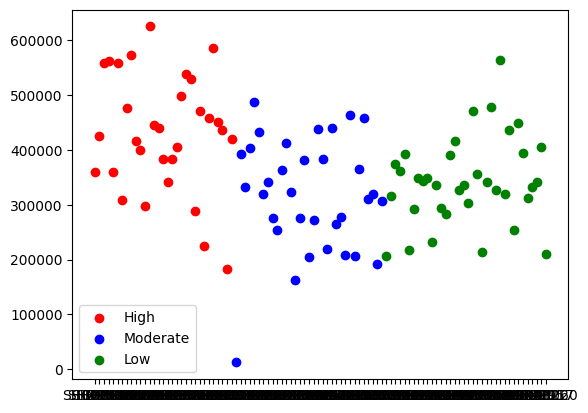

In [359]:
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "High"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "High"]["weekday_sales"],
    color="red",
)
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "Moderate"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "Moderate"]["weekday_sales"],
    color="blue",
)
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "Low"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "Low"]["weekday_sales"],
    color="green",
)
plt.legend(["High", "Moderate", "Low"])

# show the plot
plt.show()

# Working with number of customers that came more than once


In [360]:
# Get the customers that came more than once to the corresponding shop
# number of customers that came more than once
customers_that_came_more_than_once = (
    train_df_.groupby("shop_id")["customer_id"]
    .apply(lambda x: x[x.duplicated()].nunique())
    .reset_index()
)
# customers_that_came_more_than_once = train_df_.groupby('shop_id')['customer_id'].apply(lambda x: x[x.duplicated()].unique()).reset_index()

In [361]:
customers_that_came_more_than_once.head()

,shop_id,customer_id
0,SHOP001,400
1,SHOP002,919
2,SHOP003,694
3,SHOP004,684
4,SHOP005,817


In [362]:
customers_that_came_more_than_once = customers_that_came_more_than_once.rename(
    columns={"customer_id": "came_more_than_once"}
)

In [363]:
customers_that_came_more_than_once.head()

,shop_id,came_more_than_once
0,SHOP001,400
1,SHOP002,919
2,SHOP003,694
3,SHOP004,684
4,SHOP005,817


In [364]:
customer_visit_df = pd.merge(
    customers_that_came_more_than_once, store_info_data, on="shop_id"
)

In [365]:
customer_visit_df.shape

(124, 10)

In [366]:
customer_visit_df.head()

,shop_id,came_more_than_once,total_sales,unique_customers,shop_area_sq_ft,shop_profile,most_sold_item,time_since_last_purchase,weekend_sales,weekday_sales
0,SHOP001,400,409865,1118,580,Low,GINGER BEER,8.731369,202830,207035
1,SHOP002,919,1036190,2577,637,NaN,GINGER BEER,7.968026,503445,532745
2,SHOP003,694,733080,2064,810,High,GINGER BEER,8.706029,373805,359275
3,SHOP004,684,686350,1744,516,Low,GINGER BEER,8.569122,371130,315220
4,SHOP005,817,802715,2203,617,Low,GINGER BEER,8.474888,428370,374345


In [367]:
store_info_data = customer_visit_df.copy(deep=True)

In [368]:
store_info_data.head()

,shop_id,came_more_than_once,total_sales,unique_customers,shop_area_sq_ft,shop_profile,most_sold_item,time_since_last_purchase,weekend_sales,weekday_sales
0,SHOP001,400,409865,1118,580,Low,GINGER BEER,8.731369,202830,207035
1,SHOP002,919,1036190,2577,637,NaN,GINGER BEER,7.968026,503445,532745
2,SHOP003,694,733080,2064,810,High,GINGER BEER,8.706029,373805,359275
3,SHOP004,684,686350,1744,516,Low,GINGER BEER,8.569122,371130,315220
4,SHOP005,817,802715,2203,617,Low,GINGER BEER,8.474888,428370,374345


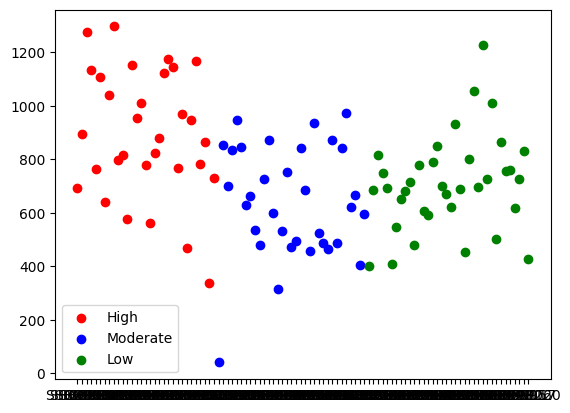

In [369]:
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "High"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "High"]["came_more_than_once"],
    color="red",
)
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "Moderate"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "Moderate"]["came_more_than_once"],
    color="blue",
)
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "Low"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "Low"]["came_more_than_once"],
    color="green",
)
plt.legend(["High", "Moderate", "Low"])

# show the plot
plt.show()

# Total quantity sold per shop

In [370]:
total_units_sold = train_df.groupby("shop_id")["quantity_sold"].sum().reset_index()
total_units_sold = total_units_sold.rename(columns={'quantity_sold': 'total_units_sold'})

# Merge with store info
store_info_data = pd.merge(store_info_data, total_units_sold, on="shop_id")
store_info_data

,shop_id,came_more_than_once,total_sales,unique_customers,shop_area_sq_ft,shop_profile,most_sold_item,time_since_last_purchase,weekend_sales,weekday_sales,total_units_sold
0,SHOP001,400,409865,1118,580,Low,GINGER BEER,8.731369,202830,207035,4128
1,SHOP002,919,1036190,2577,637,NaN,GINGER BEER,7.968026,503445,532745,10229
2,SHOP003,694,733080,2064,810,High,GINGER BEER,8.706029,373805,359275,7388
3,SHOP004,684,686350,1744,516,Low,GINGER BEER,8.569122,371130,315220,6884
4,SHOP005,817,802715,2203,617,Low,GINGER BEER,8.474888,428370,374345,8323
...,...,...,...,...,...,...,...,...,...,...,...
119,SHOP123,406,398330,1159,735,Moderate,GINGER BEER,9.444624,205665,192665,4139
120,SHOP124,864,898215,2281,606,High,GINGER BEER,8.039404,461775,436440,9496
121,SHOP125,339,376175,893,1028,High,GINGER BEER,7.381526,193080,183095,4061
122,SHOP126,595,621880,1769,328,Moderate,GINGER BEER,8.704348,314165,307715,6486


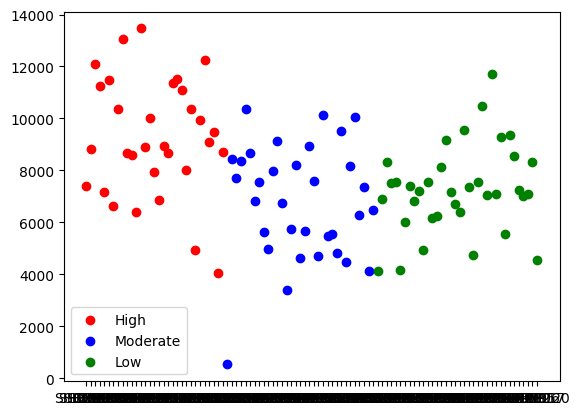

In [371]:
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "High"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "High"]["total_units_sold"],
    color="red",
)
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "Moderate"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "Moderate"]["total_units_sold"],
    color="blue",
)
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "Low"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "Low"]["total_units_sold"],
    color="green",
)
plt.legend(["High", "Moderate", "Low"])

# show the plot
plt.show()

# Working with Invoice

In [372]:
store_info_data.head()

,shop_id,came_more_than_once,total_sales,unique_customers,shop_area_sq_ft,shop_profile,most_sold_item,time_since_last_purchase,weekend_sales,weekday_sales,total_units_sold
0,SHOP001,400,409865,1118,580,Low,GINGER BEER,8.731369,202830,207035,4128
1,SHOP002,919,1036190,2577,637,NaN,GINGER BEER,7.968026,503445,532745,10229
2,SHOP003,694,733080,2064,810,High,GINGER BEER,8.706029,373805,359275,7388
3,SHOP004,684,686350,1744,516,Low,GINGER BEER,8.569122,371130,315220,6884
4,SHOP005,817,802715,2203,617,Low,GINGER BEER,8.474888,428370,374345,8323


In [373]:
train_df.head()

,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_quantity_in_liters,transaction_day,transaction_month,transaction_day_of_week
0,2021-12-11 00:00:00+00:00,147.0,BGXA,SHOP008,220,1,ORANGE BARLEY,1.50,11,12,5
1,2021-10-17 00:00:00+00:00,371.0,IA25,SHOP112,220,2,GINGER BEER,1.50,17,10,6
2,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,160,1,TONIC PET,0.50,13,12,0
3,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,150,1,CREAM SODA,1.00,13,12,0
4,2021-10-23 00:00:00+00:00,1310.0,7S00,SHOP112,210,3,STRAWBERRY MILK,0.18,23,10,5


In [374]:
# group by customer_id and invoice_id and get the total price
customer_total_spent = train_df.groupby(["shop_id", "invoice_id"])['item_price'].sum().reset_index()
# convert customer_total_spent to dataframe
customer_total_spent = pd.DataFrame(customer_total_spent)

In [375]:
customer_total_spent.head()

,shop_id,invoice_id,item_price
0,SHOP001,71216.0,220
1,SHOP001,71241.0,220
2,SHOP001,71244.0,520
3,SHOP001,71249.0,220
4,SHOP001,71278.0,130


In [381]:
# group by shop_id and get the number of invoice_ids in each shop
customer_total_orders = train_df.groupby("shop_id")["invoice_id"].nunique().reset_index()
customer_total_orders = pd.DataFrame(customer_total_orders)
customer_total_orders.head()

,shop_id,invoice_id
0,SHOP001,1526
1,SHOP002,3738
2,SHOP003,2848
3,SHOP004,2625
4,SHOP005,3165


In [382]:
customer_total_orders = customer_total_orders.rename(columns={'invoice_id': 'total_invoices'})

# Merge with store info
store_info_data = pd.merge(store_info_data, customer_total_orders, on="shop_id")
store_info_data

,shop_id,came_more_than_once,total_sales,unique_customers,shop_area_sq_ft,shop_profile,most_sold_item,time_since_last_purchase,weekend_sales,weekday_sales,total_units_sold,average_shop_earning,total_invoices
0,SHOP001,400,409865,1118,580,Low,GINGER BEER,8.731369,202830,207035,4128,261.946265,1526
1,SHOP002,919,1036190,2577,637,NaN,GINGER BEER,7.968026,503445,532745,10229,274.839486,3738
2,SHOP003,694,733080,2064,810,High,GINGER BEER,8.706029,373805,359275,7388,254.380267,2848
3,SHOP004,684,686350,1744,516,Low,GINGER BEER,8.569122,371130,315220,6884,259.055238,2625
4,SHOP005,817,802715,2203,617,Low,GINGER BEER,8.474888,428370,374345,8323,247.589258,3165
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,SHOP123,406,398330,1159,735,Moderate,GINGER BEER,9.444624,205665,192665,4139,244.156777,1601
120,SHOP124,864,898215,2281,606,High,GINGER BEER,8.039404,461775,436440,9496,272.737136,3226
121,SHOP125,339,376175,893,1028,High,GINGER BEER,7.381526,193080,183095,4061,278.367589,1265
122,SHOP126,595,621880,1769,328,Moderate,GINGER BEER,8.704348,314165,307715,6486,240.846758,2545


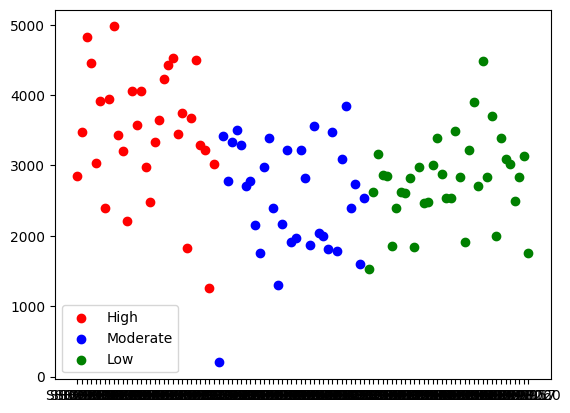

In [384]:
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "High"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "High"]["total_invoices"],
    color="red",
)
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "Moderate"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "Moderate"]["total_invoices"],
    color="blue",
)
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "Low"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "Low"]["total_invoices"],
    color="green",
)
plt.legend(["High", "Moderate", "Low"])

# show the plot
plt.show()

# Average shop earning for all three months

In [376]:
# group by shop_id and get the average total price
shop_average_earn = customer_total_spent.groupby("shop_id")['item_price'].mean().reset_index()

In [377]:
shop_average_earn = pd.DataFrame(shop_average_earn)

In [378]:
shop_average_earn.head()

,shop_id,item_price
0,SHOP001,261.946265
1,SHOP002,274.839486
2,SHOP003,254.380267
3,SHOP004,259.055238
4,SHOP005,247.589258


In [379]:
shop_average_earn = shop_average_earn.rename(columns={'item_price': 'average_shop_earning'})

# Merge with store info
store_info_data = pd.merge(store_info_data, shop_average_earn, on="shop_id")
store_info_data

,shop_id,came_more_than_once,total_sales,unique_customers,shop_area_sq_ft,shop_profile,most_sold_item,time_since_last_purchase,weekend_sales,weekday_sales,total_units_sold,average_shop_earning
0,SHOP001,400,409865,1118,580,Low,GINGER BEER,8.731369,202830,207035,4128,261.946265
1,SHOP002,919,1036190,2577,637,NaN,GINGER BEER,7.968026,503445,532745,10229,274.839486
2,SHOP003,694,733080,2064,810,High,GINGER BEER,8.706029,373805,359275,7388,254.380267
3,SHOP004,684,686350,1744,516,Low,GINGER BEER,8.569122,371130,315220,6884,259.055238
4,SHOP005,817,802715,2203,617,Low,GINGER BEER,8.474888,428370,374345,8323,247.589258
...,...,...,...,...,...,...,...,...,...,...,...,...
119,SHOP123,406,398330,1159,735,Moderate,GINGER BEER,9.444624,205665,192665,4139,244.156777
120,SHOP124,864,898215,2281,606,High,GINGER BEER,8.039404,461775,436440,9496,272.737136
121,SHOP125,339,376175,893,1028,High,GINGER BEER,7.381526,193080,183095,4061,278.367589
122,SHOP126,595,621880,1769,328,Moderate,GINGER BEER,8.704348,314165,307715,6486,240.846758


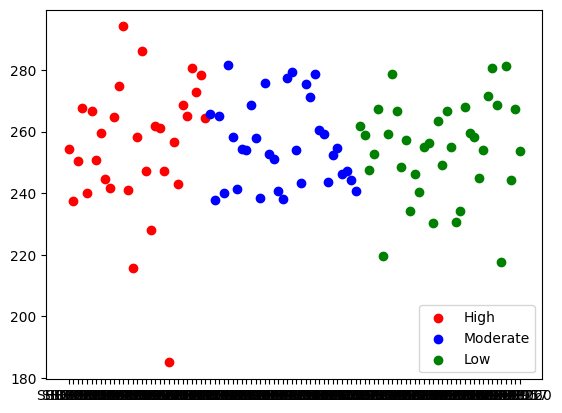

In [380]:
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "High"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "High"]["average_shop_earning"],
    color="red",
)
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "Moderate"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "Moderate"]["average_shop_earning"],
    color="blue",
)
plt.scatter(
    store_info_data[store_info_data["shop_profile"] == "Low"]["shop_id"],
    store_info_data[store_info_data["shop_profile"] == "Low"]["average_shop_earning"],
    color="green",
)
plt.legend(["High", "Moderate", "Low"])

# show the plot
plt.show()

In [397]:
store_info_data.head()

,shop_id,came_more_than_once,total_sales,unique_customers,shop_area_sq_ft,shop_profile,most_sold_item,time_since_last_purchase,weekend_sales,weekday_sales,total_units_sold,average_shop_earning,total_invoices,december_sales
0,SHOP001,400,409865,1118,580,Low,GINGER BEER,8.731369,202830,207035,4128,261.946265,1526,150800
1,SHOP002,919,1036190,2577,637,NaN,GINGER BEER,7.968026,503445,532745,10229,274.839486,3738,369125
2,SHOP003,694,733080,2064,810,High,GINGER BEER,8.706029,373805,359275,7388,254.380267,2848,240805
3,SHOP004,684,686350,1744,516,Low,GINGER BEER,8.569122,371130,315220,6884,259.055238,2625,235660
4,SHOP005,817,802715,2203,617,Low,GINGER BEER,8.474888,428370,374345,8323,247.589258,3165,229860


# Get the total amount of liters of beverage sold

In [400]:
train_df.head()

,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_quantity_in_liters,transaction_day,transaction_month,transaction_day_of_week
0,2021-12-11 00:00:00+00:00,147.0,BGXA,SHOP008,220,1,ORANGE BARLEY,1.50,11,12,5
1,2021-10-17 00:00:00+00:00,371.0,IA25,SHOP112,220,2,GINGER BEER,1.50,17,10,6
2,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,160,1,TONIC PET,0.50,13,12,0
3,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,150,1,CREAM SODA,1.00,13,12,0
4,2021-10-23 00:00:00+00:00,1310.0,7S00,SHOP112,210,3,STRAWBERRY MILK,0.18,23,10,5


In [401]:
train_df['total_quantity'] = train_df['quantity_sold'] * train_df['item_quantity_in_liters']
train_df.head()

,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_quantity_in_liters,transaction_day,transaction_month,transaction_day_of_week,total_quantity
0,2021-12-11 00:00:00+00:00,147.0,BGXA,SHOP008,220,1,ORANGE BARLEY,1.50,11,12,5,1.50
1,2021-10-17 00:00:00+00:00,371.0,IA25,SHOP112,220,2,GINGER BEER,1.50,17,10,6,3.00
2,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,160,1,TONIC PET,0.50,13,12,0,0.50
3,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,150,1,CREAM SODA,1.00,13,12,0,1.00
4,2021-10-23 00:00:00+00:00,1310.0,7S00,SHOP112,210,3,STRAWBERRY MILK,0.18,23,10,5,0.54


In [402]:
total_liters_of_beverage_sold = train_df.groupby("shop_id")["total_quantity"].sum().reset_index()
total_liters_of_beverage_sold = pd.DataFrame(total_liters_of_beverage_sold)
total_liters_of_beverage_sold.head()

,shop_id,total_quantity
0,SHOP001,4335.36
1,SHOP002,11137.70
2,SHOP003,7736.52
3,SHOP004,7197.96
4,SHOP005,8175.80


In [404]:
total_liters_of_beverage_sold = total_liters_of_beverage_sold.rename(columns={'total_quantity': 'total_liters_of_beverage_sold'})
total_liters_of_beverage_sold.head()

,shop_id,total_liters_of_beverage_sold
0,SHOP001,4335.36
1,SHOP002,11137.70
2,SHOP003,7736.52
3,SHOP004,7197.96
4,SHOP005,8175.80


In [405]:
store_info_data = pd.merge(store_info_data, total_liters_of_beverage_sold, on="shop_id")
store_info_data.head()

,shop_id,came_more_than_once,total_sales,unique_customers,shop_area_sq_ft,shop_profile,most_sold_item,time_since_last_purchase,weekend_sales,weekday_sales,total_units_sold,average_shop_earning,total_invoices,december_sales,total_liters_of_beverage_sold
0,SHOP001,400,409865,1118,580,Low,GINGER BEER,8.731369,202830,207035,4128,261.946265,1526,150800,4335.36
1,SHOP002,919,1036190,2577,637,NaN,GINGER BEER,7.968026,503445,532745,10229,274.839486,3738,369125,11137.70
2,SHOP003,694,733080,2064,810,High,GINGER BEER,8.706029,373805,359275,7388,254.380267,2848,240805,7736.52
3,SHOP004,684,686350,1744,516,Low,GINGER BEER,8.569122,371130,315220,6884,259.055238,2625,235660,7197.96
4,SHOP005,817,802715,2203,617,Low,GINGER BEER,8.474888,428370,374345,8323,247.589258,3165,229860,8175.80


In [407]:
store_info_data.head()

,shop_id,came_more_than_once,total_sales,unique_customers,shop_area_sq_ft,shop_profile,most_sold_item,time_since_last_purchase,weekend_sales,weekday_sales,total_units_sold,average_shop_earning,total_invoices,december_sales,total_liters_of_beverage_sold,avg_customers_per_month
0,SHOP001,400,409865,1118,580,Low,GINGER BEER,8.731369,202830,207035,4128,261.946265,1526,150800,4335.36,447.0
1,SHOP002,919,1036190,2577,637,NaN,GINGER BEER,7.968026,503445,532745,10229,274.839486,3738,369125,11137.70,1033.0
2,SHOP003,694,733080,2064,810,High,GINGER BEER,8.706029,373805,359275,7388,254.380267,2848,240805,7736.52,817.0
3,SHOP004,684,686350,1744,516,Low,GINGER BEER,8.569122,371130,315220,6884,259.055238,2625,235660,7197.96,725.0
4,SHOP005,817,802715,2203,617,Low,GINGER BEER,8.474888,428370,374345,8323,247.589258,3165,229860,8175.80,905.0


# Copying to a new dataframe before scaling

In [408]:
temp_df_1 = store_info_data.copy(deep=True)

In [409]:
temp_df_1.drop(["most_sold_item"], axis=1, inplace=True)

In [410]:
historical_transaction_data.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


In [412]:
temp_df_1.describe()

,came_more_than_once,total_sales,unique_customers,shop_area_sq_ft,time_since_last_purchase,weekend_sales,weekday_sales,total_units_sold,average_shop_earning,total_invoices,december_sales,total_liters_of_beverage_sold,avg_customers_per_month
count,124.000000,1.240000e+02,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,736.250000,7.528535e+05,2015.637097,619.991935,8.471902,391878.266129,360975.282258,7659.104839,256.212367,2892.927419,244726.814516,7659.843387,816.381720
std,223.736875,2.222088e+05,569.067220,126.770165,0.567920,118687.381897,105707.603824,2227.970398,17.003544,826.779787,71429.164839,2287.158325,229.113242
min,41.000000,5.317500e+04,189.000000,298.000000,7.017632,40900.000000,12275.000000,527.000000,185.063898,200.000000,53175.000000,567.880000,188.000000
25%,594.500000,6.159362e+05,1629.250000,553.250000,8.142283,314525.000000,294081.250000,6363.000000,244.935823,2393.750000,199700.000000,6031.335000,665.333333
50%,727.500000,7.340700e+05,2034.000000,617.000000,8.432878,380485.000000,353515.000000,7543.000000,256.965193,2868.000000,241392.500000,7700.720000,812.000000
75%,855.750000,8.695150e+05,2429.000000,676.000000,8.731619,453041.250000,427382.500000,8930.250000,267.694976,3403.750000,296607.500000,8861.105000,976.166667
max,1297.000000,1.241965e+06,3501.000000,1077.000000,10.962963,668450.000000,625175.000000,13463.000000,294.152689,4976.000000,384095.000000,12518.020000,1414.000000


# Splitting out train and test data


In [414]:
test = temp_df_1[temp_df_1["shop_profile"].isnull()]
train = temp_df_1[temp_df_1["shop_profile"].notnull()]

In [415]:
train_x = train.drop(["shop_profile"], axis=1).reset_index(drop=True)
train_y = train["shop_profile"].reset_index(drop=True)

test_x = test.drop(["shop_profile"], axis=1).reset_index(drop=True)

In [416]:
train_x.head()

,shop_id,came_more_than_once,total_sales,unique_customers,shop_area_sq_ft,time_since_last_purchase,weekend_sales,weekday_sales,total_units_sold,average_shop_earning,total_invoices,december_sales,total_liters_of_beverage_sold,avg_customers_per_month
0,SHOP001,400,409865,1118,580,8.731369,202830,207035,4128,261.946265,1526,150800,4335.36,447.0
1,SHOP003,694,733080,2064,810,8.706029,373805,359275,7388,254.380267,2848,240805,7736.52,817.0
2,SHOP004,684,686350,1744,516,8.569122,371130,315220,6884,259.055238,2625,235660,7197.96,725.0
3,SHOP005,817,802715,2203,617,8.474888,428370,374345,8323,247.589258,3165,229860,8175.80,905.0
4,SHOP006,750,736015,2032,676,8.338665,374895,361120,7495,252.907220,2867,246120,7466.26,811.0


In [417]:
test_x.head()

,shop_id,came_more_than_once,total_sales,unique_customers,shop_area_sq_ft,time_since_last_purchase,weekend_sales,weekday_sales,total_units_sold,average_shop_earning,total_invoices,december_sales,total_liters_of_beverage_sold,avg_customers_per_month
0,SHOP002,919,1036190,2577,637,7.968026,503445,532745,10229,274.839486,3738,369125,11137.70,1033.000000
1,SHOP019,750,826720,1922,411,8.896472,420075,406645,7930,274.133622,3001,285750,9031.98,808.666667
2,SHOP023,784,847115,2227,617,8.620996,424200,422915,8362,266.265234,3118,272095,8782.08,896.333333
3,SHOP024,571,538815,1641,676,9.473647,263025,275790,5602,234.178681,2289,154980,5814.04,662.333333
4,SHOP029,746,753420,2052,597,8.421215,403795,349625,7882,260.522074,2854,268295,7761.12,809.333333


In [418]:
train_x.columns

Index(['shop_id', 'came_more_than_once', 'total_sales', 'unique_customers',
       'shop_area_sq_ft', 'time_since_last_purchase', 'weekend_sales',
       'weekday_sales', 'total_units_sold', 'average_shop_earning',
       'total_invoices', 'december_sales', 'total_liters_of_beverage_sold',
       'avg_customers_per_month'],
      dtype='object')

In [419]:
scaling_columns = list(train_x.columns)
scaling_columns.remove("shop_id")

# Scale the data


In [420]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

train_x[scaling_columns] = min_max_scaler.fit_transform(train_x[scaling_columns])
# scaled_train_df = min_max_scaler.fit_transform(train)
# scaled_train_df = pd.DataFrame(scaled_train_df, columns=train.columns)

test_x[scaling_columns] = min_max_scaler.transform(test_x[scaling_columns])

# scaled_test_df = min_max_scaler.transform(test_x)
# scaled_test_df = pd.DataFrame(scaled_test_df, columns=test.columns)

In [421]:
train_x.head()

,shop_id,came_more_than_once,total_sales,unique_customers,shop_area_sq_ft,time_since_last_purchase,weekend_sales,weekday_sales,total_units_sold,average_shop_earning,total_invoices,december_sales,total_liters_of_beverage_sold,avg_customers_per_month
0,SHOP001,0.285828,0.300045,0.280495,0.362003,0.434371,0.258035,0.317768,0.278370,0.704769,0.277638,0.301903,0.315267,0.211256
1,SHOP003,0.519904,0.571930,0.566123,0.657253,0.427948,0.530484,0.566161,0.530380,0.635412,0.554439,0.580242,0.599879,0.513051
2,SHOP004,0.511943,0.532621,0.469505,0.279846,0.393247,0.526221,0.494281,0.491419,0.678267,0.507747,0.564331,0.554812,0.438010
3,SHOP005,0.617834,0.630507,0.608092,0.409499,0.369362,0.617433,0.590749,0.602659,0.573160,0.620812,0.546395,0.636639,0.584829
4,SHOP006,0.564490,0.574399,0.556461,0.485237,0.334835,0.532221,0.569171,0.538652,0.621909,0.558417,0.596679,0.577264,0.508157


# Encode the data of shop_profile


In [422]:
mapping = {"Low": 0, "Moderate": 1, "High": 2}
train_y = train_y.replace(mapping)

In [423]:
train_y.head()

0    0
1    2
2    0
3    0
4    0
Name: shop_profile, dtype: int64

# Split Test and Train


In [424]:
train_dataframe = pd.concat([train_x, train_y], axis=1)
train_dataframe.head()

,shop_id,came_more_than_once,total_sales,unique_customers,shop_area_sq_ft,time_since_last_purchase,weekend_sales,weekday_sales,total_units_sold,average_shop_earning,total_invoices,december_sales,total_liters_of_beverage_sold,avg_customers_per_month,shop_profile
0,SHOP001,0.285828,0.300045,0.280495,0.362003,0.434371,0.258035,0.317768,0.278370,0.704769,0.277638,0.301903,0.315267,0.211256,0
1,SHOP003,0.519904,0.571930,0.566123,0.657253,0.427948,0.530484,0.566161,0.530380,0.635412,0.554439,0.580242,0.599879,0.513051,2
2,SHOP004,0.511943,0.532621,0.469505,0.279846,0.393247,0.526221,0.494281,0.491419,0.678267,0.507747,0.564331,0.554812,0.438010,0
3,SHOP005,0.617834,0.630507,0.608092,0.409499,0.369362,0.617433,0.590749,0.602659,0.573160,0.620812,0.546395,0.636639,0.584829,0
4,SHOP006,0.564490,0.574399,0.556461,0.485237,0.334835,0.532221,0.569171,0.538652,0.621909,0.558417,0.596679,0.577264,0.508157,0


In [425]:
train_dataframe.drop(["shop_id"], axis=1, inplace=True)

In [426]:
test_dataframe = test_x.copy(deep=True)

In [427]:
test_dataframe.drop(["shop_id"], axis=1, inplace=True)

<Axes: >

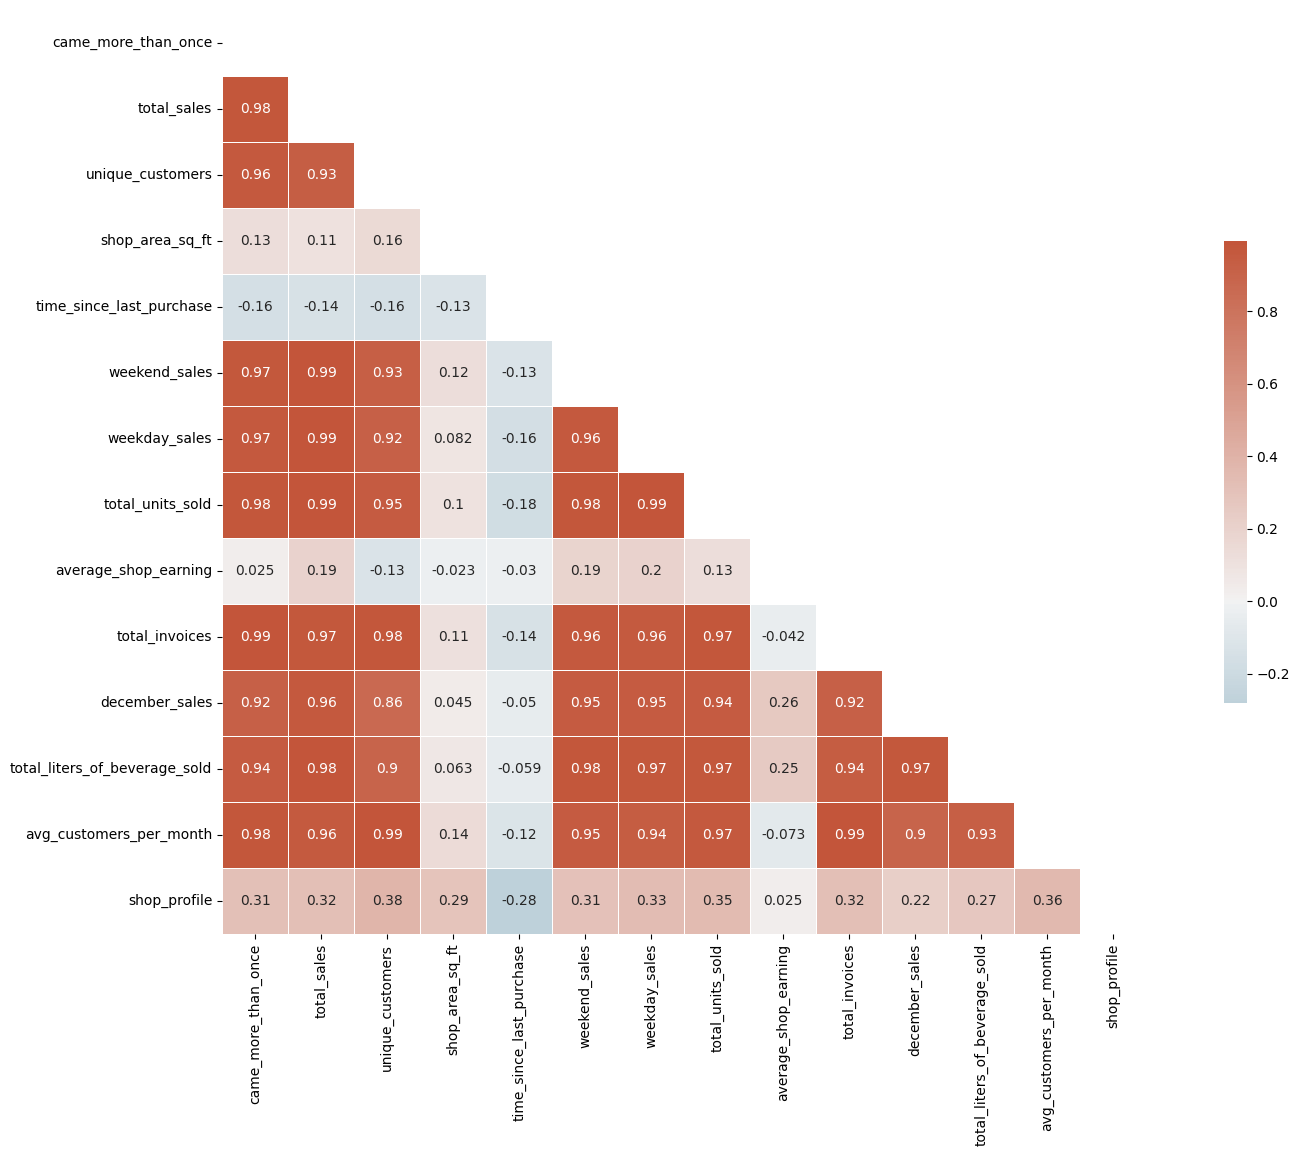

In [428]:
corr_matrix = train_dataframe.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, annot=True,
            square=True, linewidths=.7, cbar_kws={"shrink": .5})

In [429]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_dataframe.drop("shop_profile", axis=1),
    train_dataframe["shop_profile"],
    test_size=0.2,
    random_state=0,
)

# 1. Logistic Regression

In [430]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')

print('F1 score:', f1)

F1 score: 0.44700854700854703


In [431]:
# get the shop ids of test_x in a separate dataframe
test_shop_ids = test_x[["shop_id"]].reset_index(drop=True)
test_shop_ids.head()

,shop_id
0,SHOP002
1,SHOP019
2,SHOP023
3,SHOP024
4,SHOP029


In [432]:
train_x.drop(["shop_id"], axis=1, inplace=True)
test_x.drop(["shop_id"], axis=1, inplace=True)

In [433]:
test_x.head()

,came_more_than_once,total_sales,unique_customers,shop_area_sq_ft,time_since_last_purchase,weekend_sales,weekday_sales,total_units_sold,average_shop_earning,total_invoices,december_sales,total_liters_of_beverage_sold,avg_customers_per_month
0,0.699045,0.826904,0.721014,0.435173,0.240891,0.737065,0.849192,0.750000,0.822959,0.740787,0.977069,0.884493,0.689233
1,0.564490,0.650699,0.523249,0.145058,0.476218,0.604215,0.643449,0.572279,0.816488,0.586474,0.719234,0.708285,0.506253
2,0.591561,0.667856,0.615338,0.409499,0.406395,0.610788,0.669995,0.605674,0.744360,0.610972,0.677006,0.687373,0.577760
3,0.421975,0.408516,0.438406,0.485237,0.622512,0.353956,0.429948,0.392316,0.450228,0.437395,0.314830,0.439004,0.386895
4,0.561306,0.589040,0.562500,0.383825,0.355758,0.578273,0.550416,0.568568,0.691713,0.555695,0.665254,0.601938,0.506797


In [434]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')

print('F1 score:', f1)

F1 score: 0.6222222222222222


In [457]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')

print('F1 score:', f1)

F1 score: 0.5773755656108598


# 3. Decision Tree

In [459]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')

print('F1 score:', f1)

accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: {:.2f}%".format(accuracy))

F1 score: 0.5518518518518518
Accuracy: 55.00%


# 4. Support Vector Machines

In [462]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly', C=1, random_state=0)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')

print('F1 score:', f1)

accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: {:.2f}%".format(accuracy))

F1 score: 0.7220666044195455
Accuracy: 70.00%


In [480]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly', C=5, random_state=0)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')

print('F1 score:', f1)

accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: {:.2f}%".format(accuracy))

F1 score: 0.7606837606837606
Accuracy: 75.00%


In [486]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly', C=4, random_state=0)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')

print('F1 score:', f1)

accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: {:.2f}%".format(accuracy))

F1 score: 0.7606837606837606
Accuracy: 75.00%


In [465]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', C=1, random_state=0)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')

print('F1 score:', f1)

accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: {:.2f}%".format(accuracy))

F1 score: 0.5787284610814022
Accuracy: 60.00%


In [468]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', C=10, random_state=1)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')

print('F1 score:', f1)

accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: {:.2f}%".format(accuracy))

F1 score: 0.7071428571428572
Accuracy: 70.00%


In [471]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', C=1, random_state=1, break_ties=True, probability=True)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')

print('F1 score:', f1)

accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: {:.2f}%".format(accuracy))

F1 score: 0.5787284610814022
Accuracy: 60.00%


# Final

In [261]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(train_x, train_y)

y_pred = model.predict(test_x)
y_pred

array([2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 2, 1, 0, 2, 0, 1,
       0, 1], dtype=int64)

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

LR_model = LogisticRegression()
LR_model.fit(train_x, train_y)
y_pred = LR_model.predict(test_x)

# f1 = f1_score(y_test, y_pred, average='macro')

# print('F1 score:', f1)
y_pred

array([2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 2, 1, 1,
       0, 0], dtype=int64)

In [262]:
# make y_pred a dataframe
y_pred = pd.DataFrame(y_pred, columns=["shop_profile"])
y_pred.head()

,shop_profile
0,2
1,0
2,0
3,0
4,0


In [263]:
# map the values back to their original values
y_pred["shop_profile"] = y_pred["shop_profile"].map({0: "Low", 1: "Moderate", 2: "High"})
y_pred.head()

,shop_profile
0,High
1,Low
2,Low
3,Low
4,Low


In [264]:
# merge y_pred with test_shop_ids
test_shop_ids = pd.concat([test_shop_ids, y_pred], axis=1)
test_shop_ids.head(24)

,shop_id,shop_profile,shop_profile,shop_profile
0,SHOP002,High,High,High
1,SHOP019,Low,Low,Low
2,SHOP023,Low,Low,Low
3,SHOP024,Low,Low,Low
4,SHOP029,Low,Low,Low
5,SHOP030,Moderate,Moderate,Low
6,SHOP038,Low,Low,Low
7,SHOP044,Low,Low,Moderate
8,SHOP046,Moderate,Moderate,Moderate
9,SHOP050,Low,Low,Low


In [259]:
# concatenate test_data with test_shop_ids on shop_id
test_data = pd.merge(test_df, test_shop_ids, on="shop_id")
test_df.head()

,shop_id,shop_profile
0,SHOP046,NaN
1,SHOP024,NaN
2,SHOP023,NaN
3,SHOP097,NaN
4,SHOP044,NaN
